In [19]:
import matplotlib

matplotlib.rcParams["font.family"] = "Malgun Gothic"
matplotlib.rcParams["font.size"] = 10.0
matplotlib.rcParams["axes.unicode_minus"] = False

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from geopy.geocoders import Nominatim
import re
import json
import requests

### 전처리
data = pd.read_csv('대전광역시_온통대전 신청 가맹점 목록_20211130.csv',encoding='cp949')
data.columns
data.drop(columns=['순번'],inplace=True)
data.dropna(axis=0, subset=['가맹점'], inplace=True)
data.isna().sum()
data['주소']=data['주소'].str.split(',').str.get(0) 
data['주소']=data['주소'].str.split('(').str.get(0) 
data.reset_index(drop=True, inplace=True)
data

,구,가맹점,주소,동
0,중구,청석골칡냉면,대전광역시 중구 보문산로141번길 39,산성동
1,서구,토속돌구이,대전광역시 서구 대신1길 23,도마동
2,서구,퍼스트클래스둔산수학 교습소,대전광역시 서구 둔산중로 54,둔산동
3,서구,Repit (레삐)헤어,대전광역시 서구 도솔로335번길 4,괴정동
4,서구,조이헤어,대전광역시 서구 계룡로 615번길 32,탄방동
...,...,...,...,...
38043,동구,힘나는약국,대전광역시 동구 신기로101번길 21,가오동
38044,서구,힘을내요찜닭파워 서구본점,대전광역시 서구 탄방로7번길 27,탄방동
38045,중구,힘이나식당,대전광역시 중구 대종로501번길 24,선화동
38046,유성구,힘찬,대전광역시 유성구 유성대로 510,복용동


In [21]:
dong = data.groupby('동')['가맹점'].count().sort_values(ascending=False)
dong=dong.reset_index()
dong.columns = ['동','가맹점수']

dong

,동,가맹점수
0,둔산동,2305
1,탄방동,1507
2,관저동,1391
3,봉명동,1117
4,지족동,1097
...,...,...
153,주촌동,1
154,주산동,1
155,이사동,1
156,장매동,1


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='동', ylabel='가맹점수'>

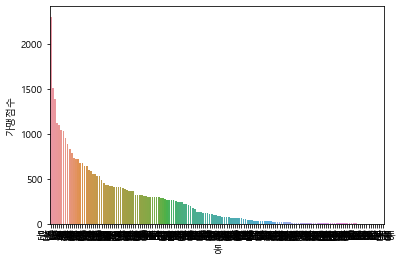

In [22]:
sns.barplot(data=dong,x='동',y='가맹점수')

In [40]:
import json
jsonfile = open('emd (2).json','r',encoding='utf-8').read()
jsondata = json.loads(jsonfile)

jsondata_daejeon = {"type": "FeatureCollection"}
jsondata_pick = []
jsondata_dong = []
# c=0
for item in jsondata['features']:
    #print(item['properties']['EMD_KOR_NM'])
    if item['properties']['EMD_CD'][:2] == '30':
        print(item['properties']['EMD_KOR_NM'])
#         c+=1
# print(c)
        dong = item['properties']['EMD_KOR_NM']


    #     if dong == '가야제1동':
    #         dong = '가야1동'
    #     item['id'] = dong
    #     jsondata_dong.append(dong)
    #     jsondata_pick.append(item)
        
# jsondata_busan['features'] = jsondata_pick
# jsondata_busan

원동
인동
효동
천동
가오동
신흥동
판암동
삼정동
용운동
대동
자양동
신안동
소제동
가양동
용전동
성남동
홍도동
삼성동
정동
중동
추동
비룡동
주산동
용계동
마산동
효평동
직동
세천동
신상동
신하동
신촌동
사성동
내탑동
오동
주촌동
낭월동
대별동
이사동
대성동
장척동
소호동
구도동
삼괴동
상소동
하소동
은행동
선화동
목동
중촌동
대흥동
문창동
석교동
호동
옥계동
대사동
부사동
용두동
오류동
태평동
유천동
문화동
산성동
사정동
안영동
무수동
구완동
침산동
목달동
정생동
어남동
금동
복수동
변동
도마동
정림동
용문동
탄방동
괴정동
가장동
내동
갈마동
둔산동
월평동
가수원동
도안동
관저동
흑석동
매노동
산직동
장안동
평촌동
오동
우명동
원정동
용촌동
봉곡동
괴곡동
만년동
원내동
교촌동
대정동
용계동
학하동
계산동
성북동
세동
송정동
방동
봉명동
구암동
덕명동
원신흥동
상대동
복용동
장대동
갑동
노은동
지족동
죽동
궁동
어은동
구성동
신성동
가정동
도룡동
장동
방현동
화암동
덕진동
하기동
추목동
자운동
신봉동
수남동
안산동
외삼동
반석동
문지동
전민동
원촌동
탑립동
용산동
봉산동
관평동
송강동
금고동
대동
금탄동
신동
둔곡동
구룡동
오정동
대화동
읍내동
연축동
신대동
와동
송촌동
법동
중리동
비래동
석봉동
목상동
문평동
신일동
덕암동
상서동
평촌동
장동
용호동
이현동
갈전동
부수동
황호동
삼정동
미호동
신탄진동


NameError: name 'info' is not defined

In [ ]:
m = folium.Map(jeju_loc,zoom_start=11)
jsonfile = open('jeju.json','r').read()
jsondata = json.loads(jsonfile)
folium.Choropleth(geo_data = jsondata,  
                  data = data,
                  columns = ['읍면동','인구'],
                  fill_color = 'YlGn',
                  key_on = 'feature.id').add_to(m)